In [0]:
# Scrape and analyze coffee shops around DTLA
import requests as r # To work with Yelp's API
import json # To turn response into iterable data
import pandas as pd # For data preparation
from itertools import product # To expand search parameters
import seaborn as sns # For visualizations
import matplotlib.pyplot as plt # For visualizations

In [0]:
# Set up key ingredients for Yelp's API web request
# Documentation: https://www.yelp.com/developers/documentation/v3/business_search
url = ' https://api.yelp.com/v3/businesses/search'
key = 'key'
headers = {
    'Authorization': 'Bearer %s' % key
}

In [68]:
# Get first 50 Yelp results for tacos
# Set search criteria
url_params = {
    'location': '1200 W 7th Street, Los Angeles 90017',
    'limit': 50,
    'term': 'tacos',
    'radius': 804,
    'offset': 0
}

# Prepare and show response
response = r.request('GET', url, headers=headers, params=url_params)
data = response.json() 
print(data)

{'businesses': [{'id': '008auoAIybTFWng7M8D3Gw', 'alias': 'fernandos-taco-los-angeles', 'name': "Fernando's Taco", 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/2flA6pngbbkMI_ZOBHqRzw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/fernandos-taco-los-angeles?adjust_creative=bdJBYIrivjkgp_4AV--1ew&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=bdJBYIrivjkgp_4AV--1ew', 'review_count': 137, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}], 'rating': 4.0, 'coordinates': {'latitude': 34.0452965202771, 'longitude': -118.264306058722}, 'transactions': [], 'price': '$', 'location': {'address1': '815 W Olympic Blvd', 'address2': '', 'address3': '', 'city': 'Los Angeles', 'zip_code': '90015', 'country': 'US', 'state': 'CA', 'display_address': ['815 W Olympic Blvd', 'Los Angeles, CA 90015']}, 'phone': '+12134897615', 'display_phone': '(213) 489-7615', 'distance': 672.8857751119435}, {'id': 'gZEUgEzxGosPd-qGQGNXBQ', 'alias': 'la-guadalupana-los-a

In [4]:
# Turn response into lists and then zip into a dataframe
fifty_listings = []
cols = ['Name','Reviews','Rating','Lat','Long','Location','Phone']
for business in data['businesses']:
  name = business['name']
  reviews = business['review_count']
  rating = business['rating']
  latitude = business['coordinates']['latitude']
  longitude = business['coordinates']['longitude']
  location = business['location']['display_address']
  phone = business['display_phone']
  fifty_listings.append([name, reviews, rating, latitude, longitude, location, phone])
  df = df = pd.DataFrame.from_records(fifty_listings, index='Name', columns=cols)
df.head()

,Reviews,Rating,Lat,Long,Location,Phone
Name,,,,,,
Fernando's Taco,137,4.0,34.045297,-118.264306,"[815 W Olympic Blvd, Los Angeles, CA 90015]",(213) 489-7615
La Guadalupana,46,4.0,34.056327,-118.267904,"[1422 W 6th St, Los Angeles, CA 90017]",(213) 483-2973
Veranda,112,4.0,34.045529,-118.264003,"[939 S Figueroa St, Ste 500, Los Angeles, CA 9...",(213) 660-3032
East Los Angeles Tacos,12,4.0,34.046246,-118.266960,"[953 Georgia St, Los Angeles, CA 90015]",(855) 352-8226
El Tejano,18,4.0,34.045356,-118.259012,"[801 S Grand Ave, Los Angeles, CA 90017]",(213) 629-2449


In [0]:
# TODO: Remove [] from Location

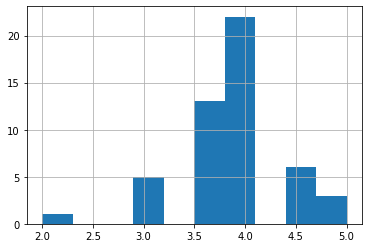

In [6]:
df['Rating'].hist()

In [0]:
# Scale Scrape to 2 Locations for 900 listings
two_addresses = ['1200 W 7th Street, Los Angeles CA 90017', '200 N Spring Street, Los Angeles CA 90012']
offset = [0, 51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601, 651, 701, 751, 801, 851, 901]

# Create list of tuples
combo = list(product(two_addresses, offset))

In [16]:
# Scaled for loop
for a, o in combo:
  dual_params = {
    'location': a,
    'limit': 50,
    'term': 'tacos',
    'radius': 804,
    'offset': o}
  response = r.request('GET', url, headers=headers, params=dual_params)
  data = response.json()
  for business in data['businesses']:
    name = business['name']
    reviews = business['review_count']
    rating = business['rating']
    latitude = business['coordinates']['latitude']
    longitude = business['coordinates']['longitude']
    location = business['location']['display_address']
    phone = business['display_phone']
    fifty_listings.append([name, reviews, rating, latitude, longitude, location, phone])
  df = df = pd.DataFrame.from_records(fifty_listings, index='Name', columns=cols)
print(f'Total records: {len(df)}')
df.head()

Total records: 364


,Reviews,Rating,Lat,Long,Location,Phone
Name,,,,,,
Fernando's Taco,137,4.0,34.045297,-118.264306,"[815 W Olympic Blvd, Los Angeles, CA 90015]",(213) 489-7615
La Guadalupana,46,4.0,34.056327,-118.267904,"[1422 W 6th St, Los Angeles, CA 90017]",(213) 483-2973
Veranda,112,4.0,34.045529,-118.264003,"[939 S Figueroa St, Ste 500, Los Angeles, CA 9...",(213) 660-3032
East Los Angeles Tacos,12,4.0,34.046246,-118.266960,"[953 Georgia St, Los Angeles, CA 90015]",(855) 352-8226
El Tejano,18,4.0,34.045356,-118.259012,"[801 S Grand Ave, Los Angeles, CA 90017]",(213) 629-2449


In [18]:
# Summary Statistics
df.describe()

,Reviews,Rating,Lat,Long
count,364.000000,364.000000,355.000000,355.000000
mean,397.112637,3.885989,34.040089,-118.253313
std,854.864474,0.690388,0.067972,0.108144
min,1.000000,1.000000,33.658100,-119.165681
25%,17.000000,3.500000,34.046451,-118.265186
50%,77.000000,4.000000,34.050529,-118.250120
75%,362.000000,4.500000,34.053490,-118.245123
max,8420.000000,5.000000,34.280921,-117.401168


In [19]:
# Light Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, Fernando's Taco to Catered Fit
Data columns (total 6 columns):
Reviews     364 non-null int64
Rating      364 non-null float64
Lat         355 non-null float64
Long        355 non-null float64
Location    364 non-null object
Phone       364 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 19.9+ KB


Text(0.5, 1.0, 'Distribution of Reviews')

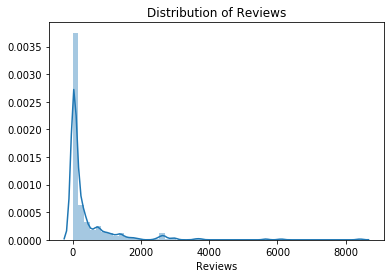

In [25]:
# Reviews Distribution
sns.distplot(df['Reviews'])
plt.title('Distribution of Reviews')

Text(0.5, 1.0, 'Distribution of Ratings')

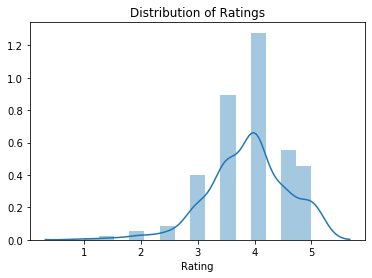

In [27]:
# Ratings Distribution
sns.distplot(df['Rating'])
plt.title('Distribution of Ratings')

In [0]:
# Top 3 Spots
df_sorted = df.sort_values('Rating', ascending=False)
top3 = df_sorted.iloc[:3]
top10 = df_sorted.iloc[:10]

In [30]:
# sns.barplot(x='Reviews', y='Name', data=top3)

top3.head()

,Reviews,Rating,Lat,Long,Location,Phone
Name,,,,,,
Tacos y Papas,4,5.0,34.046400,-118.272158,"[1099 Albany St, Los Angeles, CA 90015]",
Tacos La Tehuanita,119,5.0,34.121169,-118.205555,"[5100 York Blvd, Los Angeles, CA 90042]",(323) 243-7715
Marinate,166,5.0,34.083704,-118.309666,"[1842 W Washington Blvd, Los Angeles, CA 90007]",(323) 325-3237


Text(0.5, 1.0, 'Reviews & Ratings For Taco Yelp Listings in and around DTLA')

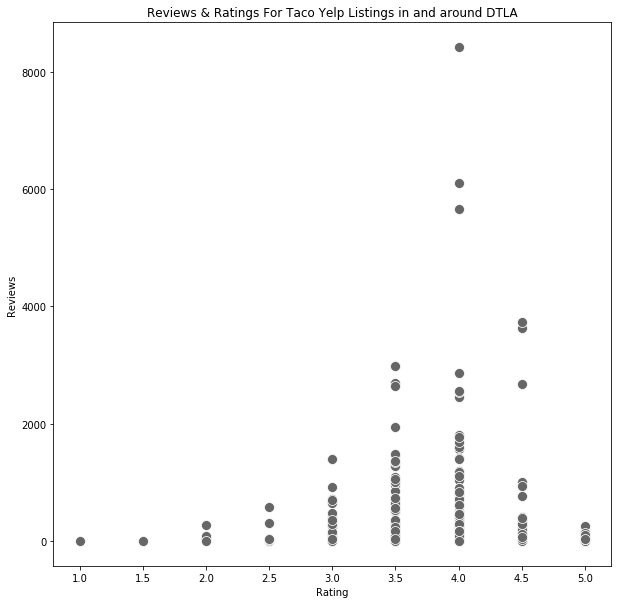

In [67]:
# Explore Ratings & Reviews
plt.figure(figsize=(10,10))
sns.scatterplot(x='Rating', y='Reviews', data=df, palette='pastel', color='0.4', s=100)
plt.title('Reviews & Ratings For Taco Yelp Listings in and around DTLA')